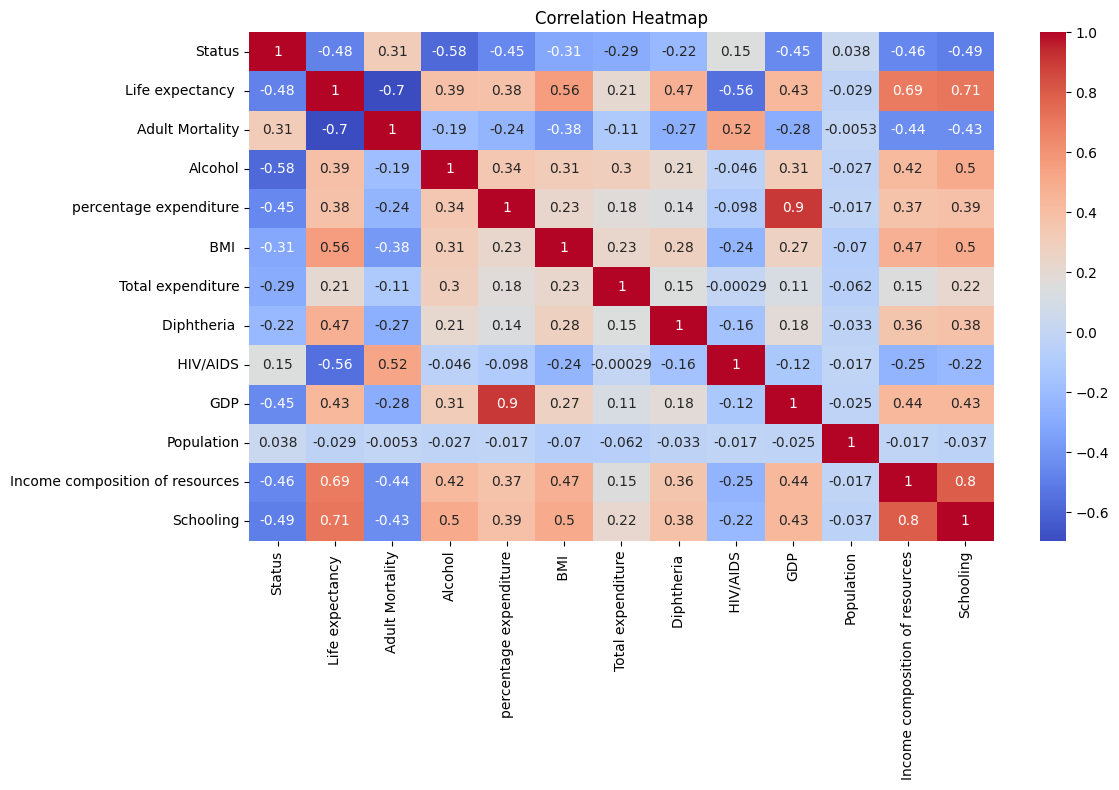

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ------------------ PART 1: Load and Preprocess ------------------

# Load dataset
df = pd.read_csv("Life Expectancy Data.csv")

# drop irrelevant or redundannt columms
df = df.drop(columns=[
    'Country',
    'Year',
    'infant deaths',
    'under-five deaths ',
    'Measles ',
    'Polio',
    ' thinness  1-19 years',
    ' thinness 5-9 years',
    'Hepatitis B'
])

#Fill missing numerical values with median
num_cols = df.select_dtypes(include=['number']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Fill missing categorical values with mode
cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

# Encode categorical variables
label_encoder = LabelEncoder()
for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

In [ ]:
print("=== Info ===")
df.info()

print("\n=== Shape & Columns ===")
print("Shape:", df.shape)

#df.isnull().sum()


=== Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Status                           2938 non-null   int64  
 1   Life expectancy                  2938 non-null   float64
 2   Adult Mortality                  2938 non-null   float64
 3   Alcohol                          2938 non-null   float64
 4   percentage expenditure           2938 non-null   float64
 5    BMI                             2938 non-null   float64
 6   Total expenditure                2938 non-null   float64
 7   Diphtheria                       2938 non-null   float64
 8    HIV/AIDS                        2938 non-null   float64
 9   GDP                              2938 non-null   float64
 10  Population                       2938 non-null   float64
 11  Income composition of resources  2938 non-null   float64
 12  Schooli

In [ ]:
# ------------------ PART 2: Feature and Target ------------------

X = df.drop(columns=["Schooling"])
y = df["Schooling"]

# One-hot encoding (if needed, extra safety)
X = pd.get_dummies(X)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Add intercept term bias 1
X_intercept = np.c_[np.ones(X_scaled.shape[0]), X_scaled]


# ------------------ PART 3: Manual Gradient Descent (Default) -----------------

def hypothesis(X, theta):
    return X @ theta

def compute_cost(X, y, theta):
    m = len(y)
    predictions = hypothesis(X, theta)
    return (1 / (2 * m)) * np.sum((predictions - y) ** 2)

def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = []
    for i in range(iterations):
        predictions = hypothesis(X, theta)
        error = predictions - y

        #gradient vector of partial derivative
        gradient = (1 / m) * X.T @ error
        theta -= alpha * gradient

        cost = compute_cost(X, y, theta)
        cost_history.append(cost)

        print(f"Iter {i+1:3d}, Cost: {cost:.6f}, θ: {theta}")

        if i > 0 and abs(cost_history[i] - cost_history[i-1]) < 1e-6:
            print("Converged.")
            break
    return theta, cost_history

# Default run with alpha = 0.01
alpha = 0.01
iterations = 500
theta_init = np.zeros(X_intercept.shape[1])
theta_final, cost_history = gradient_descent(X_intercept, y.to_numpy(), theta_init, alpha, iterations)

# ------------------ PART 4: Manual Predictions ------------------


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


X_train_intercept = np.c_[np.ones(X_train_scaled.shape[0]), X_train_scaled]
X_test_intercept = np.c_[np.ones(X_test_scaled.shape[0]), X_test_scaled]

y_pred_train_manual = hypothesis(X_train_intercept, theta_final)
y_pred_test_manual = hypothesis(X_test_intercept, theta_final)


# ------------------ PART 5: SKLearn Regression ------------------


#Creates an instance of scikit-learn’s
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

y_pred_train_sklearn = lr_model.predict(X_train_scaled)
y_pred_test_sklearn = lr_model.predict(X_test_scaled)







Iter   1, Cost: 75.735561, θ: [ 0.12009837 -0.01609388  0.02327823 -0.01414918  0.01628696  0.01260376
  0.01631659  0.00718763  0.01237478 -0.00714364  0.01411046 -0.00120181
  0.02596595]
Iter   2, Cost: 74.076084, θ: [ 0.23899575 -0.03142692  0.04559225 -0.02758882  0.03190183  0.02453006
  0.03192661  0.01400941  0.02420305 -0.01382683  0.02750584 -0.00234634
  0.05104869]
Iter   3, Cost: 72.465837, θ: [ 0.35670416 -0.04603298  0.06698455 -0.04035088  0.04687379  0.0358101
  0.04686086  0.02048184  0.03550855 -0.02007103  0.0402188  -0.00343612
  0.07528576]
Iter   4, Cost: 70.902430, θ: [ 0.47323548 -0.05994439  0.08749569 -0.05246591  0.06123073  0.04647365
  0.06114876  0.02662068  0.04631397 -0.02589676  0.05228057 -0.0044736
  0.09871309]
Iter   5, Cost: 69.383646, θ: [ 0.58860149 -0.07319209  0.10716447 -0.06396311  0.07499933  0.05654919
  0.07481844  0.03244097  0.05664099 -0.03132361  0.06372095 -0.0054611
  0.12136497]
Iter   6, Cost: 67.907419, θ: [ 0.70281384 -0.0858055

Streaming output truncated to the last 5000 lines.
  4.38386208e-01 -9.49592201e-03  2.64712994e-01  3.97561890e-02
  1.28512489e-01  2.67412397e-01  1.23110855e-01 -1.87407513e-02
  1.51689964e+00]
Iter 404, Cost: 1.531148, θ: [ 1.18027483e+01 -1.28214088e-01  8.64097455e-01 -2.49172209e-02
  4.38338243e-01 -9.63666706e-03  2.64419115e-01  3.97708892e-02
  1.28219847e-01  2.67681198e-01  1.23048538e-01 -1.87517954e-02
  1.51759930e+00]
Iter 405, Cost: 1.530603, θ: [ 1.18048191e+01 -1.27931483e-01  8.64618795e-01 -2.46275321e-02
  4.38290294e-01 -9.77657748e-03  2.64126017e-01  3.97859801e-02
  1.27928201e-01  2.67948574e-01  1.22986695e-01 -1.87628472e-02
  1.51829501e+00]
Iter 406, Cost: 1.530067, θ: [ 1.18068693e+01 -1.27649975e-01  8.65138958e-01 -2.43388525e-02
  4.38242364e-01 -9.91565943e-03  2.63833698e-01  3.98014567e-02
  1.27637551e-01  2.68214535e-01  1.22925323e-01 -1.87739062e-02
  1.51898681e+00]
Iter 407, Cost: 1.529540, θ: [ 1.18088990e+01 -1.27369560e-01  8.65657947e-

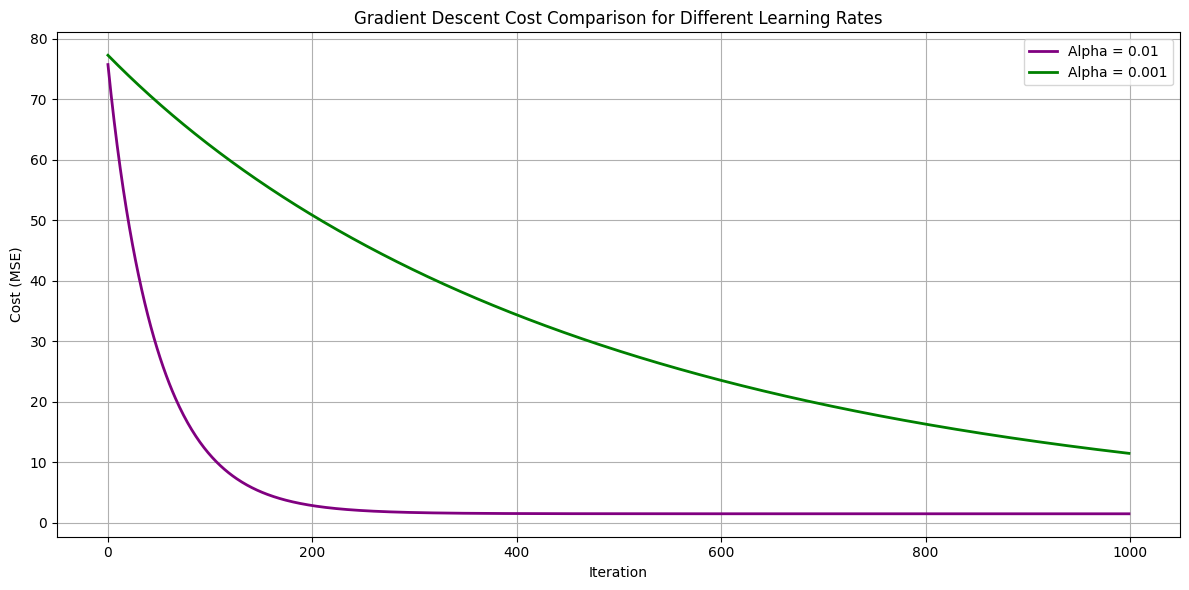


Best Learning Rate (Alpha): 0.01
Optimal Iteration: 999 with Minimum Cost: 1.493475558032664


In [ ]:
# ------------------ PART 6: Cost Comparison for Two Learning Rates ------------------

# Run gradient descent for two alphas
alpha1 = 0.01
alpha2 = 0.001
iterations = 1000
theta_init = np.zeros(X_intercept.shape[1])

_, cost_history_01 = gradient_descent(X_intercept, y.to_numpy(), theta_init.copy(), alpha1, iterations)
_, cost_history_001 = gradient_descent(X_intercept, y.to_numpy(), theta_init.copy(), alpha2, iterations)

# Plot comparison
plt.figure(figsize=(12, 6))
plt.plot(cost_history_01, label='Alpha = 0.01', color='purple', linewidth=2)
plt.plot(cost_history_001, label='Alpha = 0.001', color='green', linewidth=2)

plt.title('Gradient Descent Cost Comparison for Different Learning Rates')
plt.xlabel('Iteration')
plt.ylabel('Cost (MSE)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Store minimum cost & iteration for both alphas
optimal_costs = {
    alpha1: min(cost_history_01),
    alpha2: min(cost_history_001)
}

optimal_iterations = {
    alpha1: cost_history_01.index(min(cost_history_01)),
    alpha2: cost_history_001.index(min(cost_history_001))
}

# Find the best alpha (lowest cost)
best_alpha = min(optimal_costs, key=optimal_costs.get)
best_cost = optimal_costs[best_alpha]
best_iteration = optimal_iterations[best_alpha]

# Print the summary lines
print(f"\nBest Learning Rate (Alpha): {best_alpha}")
print(f"Optimal Iteration: {best_iteration} with Minimum Cost: {best_cost}")

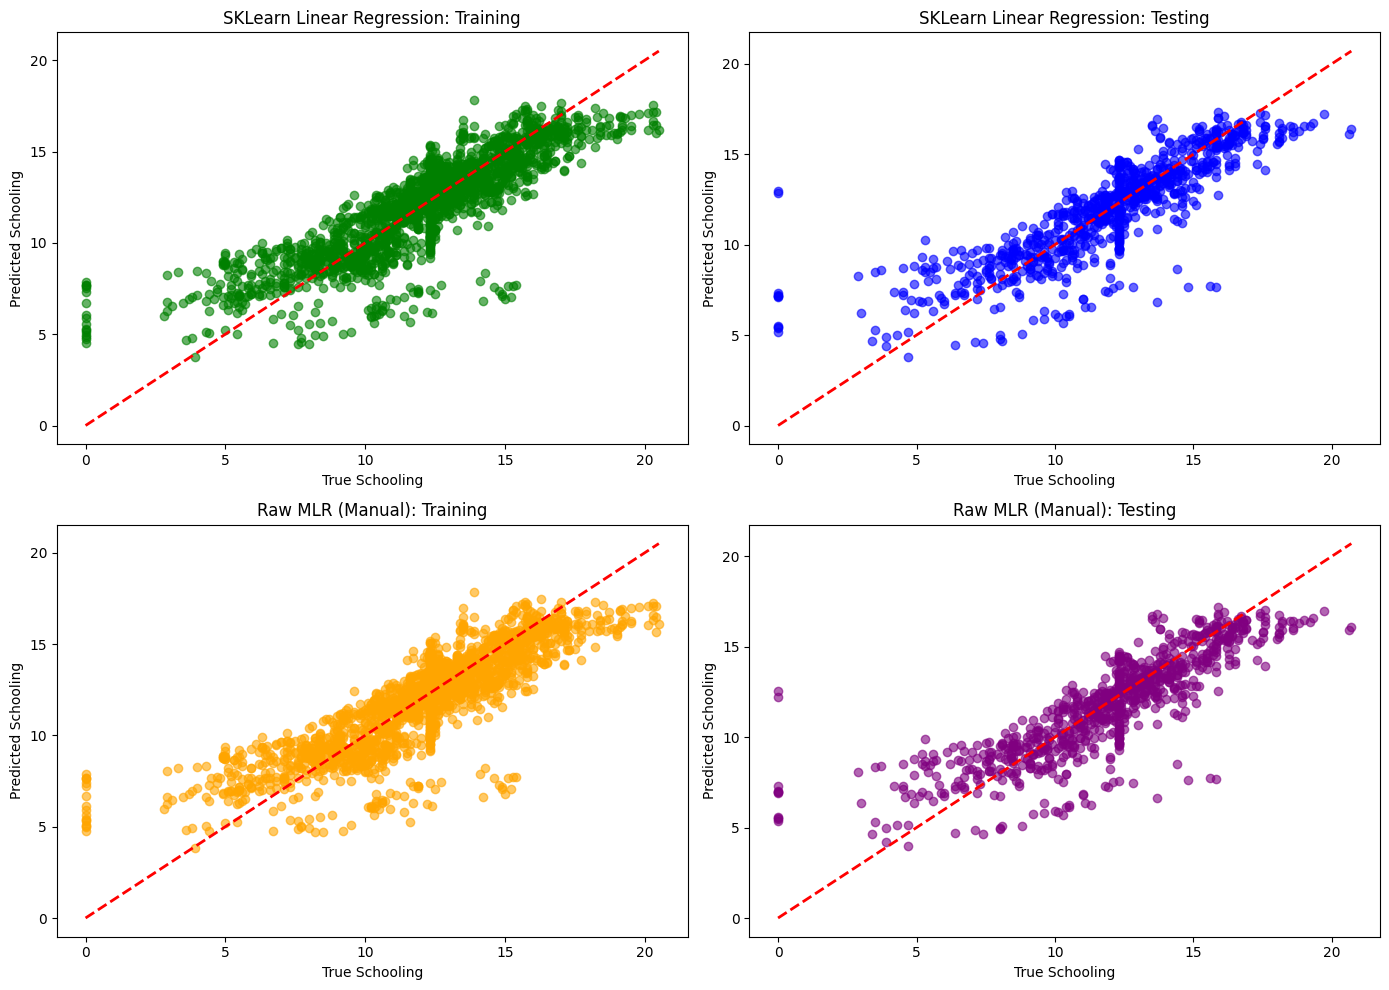

In [ ]:
# -------------------- PART 7: SKLearn and Raw MLR Prediction Plots --------------------


fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# SKLearn: Training
axes[0][0].scatter(y_train, y_pred_train_sklearn, color='green', alpha=0.6)
axes[0][0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
axes[0][0].set_title('SKLearn Linear Regression: Training')
axes[0][0].set_xlabel('True Schooling')
axes[0][0].set_ylabel('Predicted Schooling')

# SKLearn: Testing
axes[0][1].scatter(y_test, y_pred_test_sklearn, color='blue', alpha=0.6)
axes[0][1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0][1].set_title('SKLearn Linear Regression: Testing')
axes[0][1].set_xlabel('True Schooling')
axes[0][1].set_ylabel('Predicted Schooling')

# Raw MLR: Training
axes[1][0].scatter(y_train, y_pred_train_manual, color='orange', alpha=0.6)
axes[1][0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
axes[1][0].set_title('Raw MLR (Manual): Training')
axes[1][0].set_xlabel('True Schooling')
axes[1][0].set_ylabel('Predicted Schooling')

# Raw MLR: Testing
axes[1][1].scatter(y_test, y_pred_test_manual, color='purple', alpha=0.6)
axes[1][1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1][1].set_title('Raw MLR (Manual): Testing')
axes[1][1].set_xlabel('True Schooling')
axes[1][1].set_ylabel('Predicted Schooling')

plt.tight_layout()
plt.show()



SKLearn Train
MAE: 1.2206
MSE: 2.8564
RMSE: 1.6901
R2: 0.7256

SKLearn Test
MAE: 1.2450
MSE: 3.3013
RMSE: 1.8169
R2: 0.7055

Manual Train
MAE: 1.2161
MSE: 2.8660
RMSE: 1.6929
R2: 0.7247

Manual Test
MAE: 1.2418
MSE: 3.2812
RMSE: 1.8114
R2: 0.7073


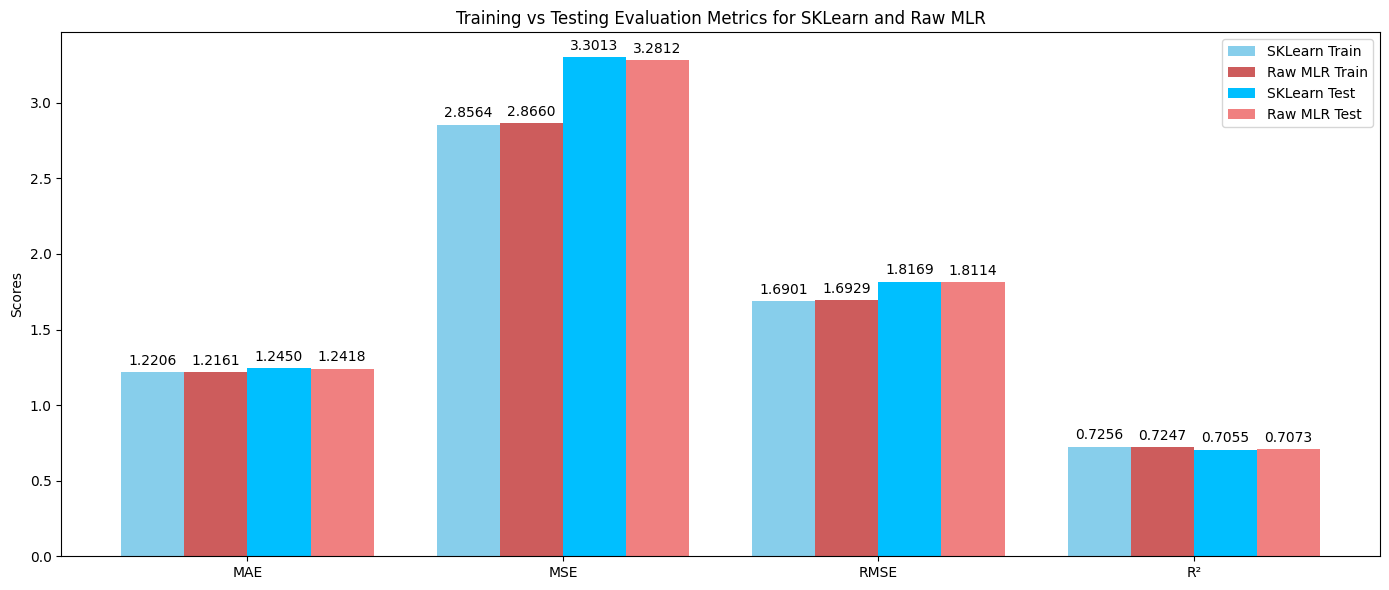

In [ ]:
# ------------------ PART 8: Evaluation ------------------

def evaluate(y_true, y_pred):
    return {
        "MAE": mean_absolute_error(y_true, y_pred),
        "MSE": mean_squared_error(y_true, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_true, y_pred)),
        "R2": r2_score(y_true, y_pred)
    }

results = {
    "SKLearn Train": evaluate(y_train, y_pred_train_sklearn),
    "SKLearn Test": evaluate(y_test, y_pred_test_sklearn),
    "Manual Train": evaluate(y_train, y_pred_train_manual),
    "Manual Test": evaluate(y_test, y_pred_test_manual)
}

# Print results
for k, v in results.items():
    print(f"\n{k}")
    for metric, value in v.items():
        print(f"{metric}: {value:.4f}")

metrics = ['MAE', 'MSE', 'RMSE', 'R²']

# SKLearn values
sklearn_train_values = [
    results["SKLearn Train"]["MAE"],
    results["SKLearn Train"]["MSE"],
    results["SKLearn Train"]["RMSE"],
    results["SKLearn Train"]["R2"]
]

sklearn_test_values = [
    results["SKLearn Test"]["MAE"],
    results["SKLearn Test"]["MSE"],
    results["SKLearn Test"]["RMSE"],
    results["SKLearn Test"]["R2"]
]

# Manual values
manual_train_values = [
    results["Manual Train"]["MAE"],
    results["Manual Train"]["MSE"],
    results["Manual Train"]["RMSE"],
    results["Manual Train"]["R2"]
]

manual_test_values = [
    results["Manual Test"]["MAE"],
    results["Manual Test"]["MSE"],
    results["Manual Test"]["RMSE"],
    results["Manual Test"]["R2"]
]

# ------------------ Bar Plot ------------------

x = np.arange(len(metrics))  # x locations
width = 0.2  # width of each bar

fig, ax = plt.subplots(figsize=(14, 6))

rects1 = ax.bar(x - 1.5*width, sklearn_train_values, width, label='SKLearn Train', color='skyblue')
rects2 = ax.bar(x - 0.5*width, manual_train_values, width, label='Raw MLR Train', color='indianred')
rects3 = ax.bar(x + 0.5*width, sklearn_test_values, width, label='SKLearn Test', color='deepskyblue')
rects4 = ax.bar(x + 1.5*width, manual_test_values, width, label='Raw MLR Test', color='lightcoral')

# Add labels and titles
ax.set_ylabel('Scores')
ax.set_title('Training vs Testing Evaluation Metrics for SKLearn and Raw MLR')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Function to annotate bars with values
def annotate_bars(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Annotate all bars
for r in [rects1, rects2, rects3, rects4]:
    annotate_bars(r)

plt.tight_layout()
plt.show()